In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
file_path = 'E:\SUSI\PELATIHAN\DATA ENGINEER\DIGITALSKOLA\WEEK 11\Homework\k-means-cluster-main\data\Mall_Customers.csv'

sns.set()

data = pd.read_csv(file_path)

print(data)


     CustomerID   Genre  Age  Income  Spending
0             1    Male   19      15        39
1             2    Male   21      15        81
2             3  Female   20      16         6
3             4  Female   23      16        77
4             5  Female   31      17        40
..          ...     ...  ...     ...       ...
195         196  Female   35     120        79
196         197  Female   45     126        28
197         198    Male   32     126        74
198         199    Male   32     137        18
199         200    Male   30     137        83

[200 rows x 5 columns]


In [6]:
x = data.iloc[:,3:5]

x

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
import pickle

n_cluster = 3

kmeans = KMeans(n_cluster)
kmeans.fit(x)

with open('E:\SUSI\PELATIHAN\DATA ENGINEER\DIGITALSKOLA\WEEK 11\Homework\k-means-cluster-main\output\kmeans_location.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

c:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
identified_clusters = kmeans.fit_predict(x)

print(identified_clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


c:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
data_with_clusters = data.copy()

data_with_clusters

,CustomerID,Genre,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
data_with_clusters['Clusters'] = identified_clusters

data_with_clusters

,CustomerID,Genre,Age,Income,Spending,Clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


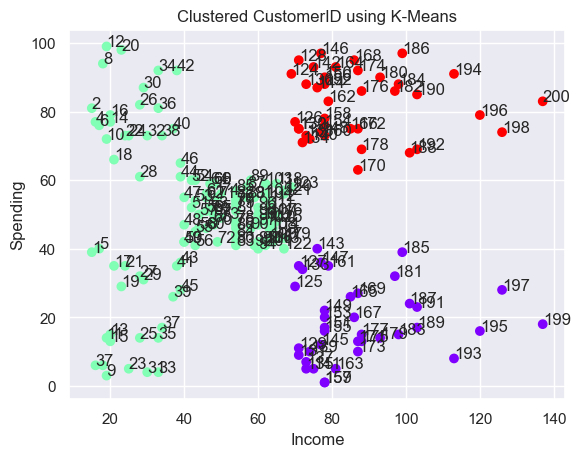

In [12]:
plt.scatter(data_with_clusters['Income'], data_with_clusters['Spending'], c=data_with_clusters['Clusters'], cmap='rainbow')

# label plot
plt.title('Clustered CustomerID using K-Means')
plt.xlabel('Income')
plt.ylabel('Spending')

# anotasi plot
for i, txt in enumerate(data_with_clusters['CustomerID']):
    plt.annotate(txt, (x.loc[i, 'Income'], x.loc[i, 'Spending']))


# Elbow method untuk mencari jumlah cluster yang tepat

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [13]:
sns.set()

data = pd.read_csv(file_path)

data

,CustomerID,Genre,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
x = data.iloc[:, 3:5]

x

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [15]:
max_cluster = 7

wcss=[]
number_clusters = range(1, max_cluster)

number_clusters

range(1, 7)

In [16]:
for n_cluster in number_clusters:
    kmeans = KMeans(n_cluster)

    # fitting model
    kmeans.fit(x)

    # wcss
    wcss_iter = kmeans.inertia_

    wcss.append(wcss_iter)

wcss

c:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: Future

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001]

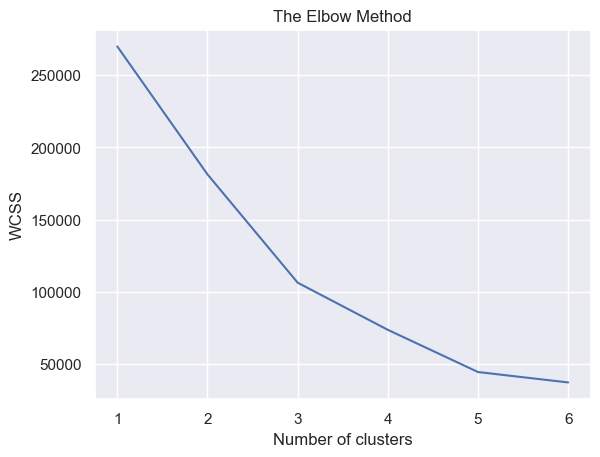

In [17]:
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()